In [140]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 1e-6
end_value1 = 2e-5
 
 
# particle_diameter_1 = 1e-4
# particle_diameter_2 = 3e-7

start_value2 = 5e-8
end_value2 = 1e-7


column_header =['particle_diameter_1', 'particle_diameter_2']
interval_1 = (end_value1-start_value1)/20
print(interval_1)
error_K_1 = interval_1**2/150*(0.001)/(1-0.1)**2
print('error_K_1 =', error_K_1)
interval_2 = (end_value2-start_value2)/20
print(interval_2)  
error_K_2 = interval_2/1.75*0.001/(1-0.1)
print('error K_2 =', error_K_2)

array1 = np.linspace(start_value1, end_value1, 20) 
array2 = np.linspace(start_value2, end_value2, 20)

combinations = list(product(array1, array2))
 
# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



9.5e-07
error_K_1 = 7.427983539094651e-18
2.5e-09
error K_2 = 1.5873015873015873e-12
     particle_diameter_1  particle_diameter_2
0               0.000001         5.000000e-08
1               0.000001         5.263158e-08
2               0.000001         5.526316e-08
3               0.000001         5.789474e-08
4               0.000001         6.052632e-08
..                   ...                  ...
395             0.000020         8.947368e-08
396             0.000020         9.210526e-08
397             0.000020         9.473684e-08
398             0.000020         9.736842e-08
399             0.000020         1.000000e-07

[400 rows x 2 columns]


In [141]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT5.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
md_df
md_df = md_df.drop(836)


# # Define the name of the column to be used as the new index
# new_index_column = t_header

# # Set the new index using the specified column
# md_df.set_index(new_index_column, inplace=True)
# print('Modeling Results')
# md_df


(0.0, 1200.0)

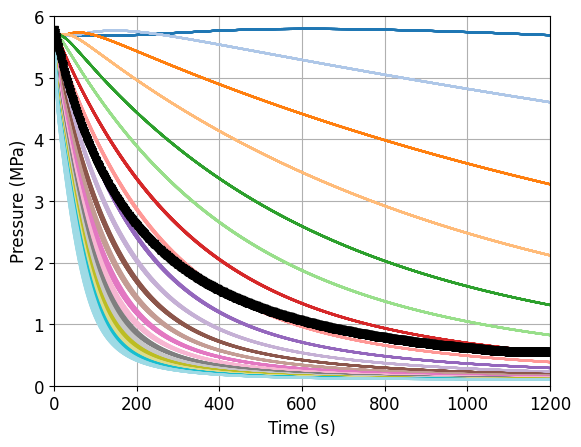

In [142]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT5_800_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.ylim(0, 6)
plt.xlim(0, 1200)



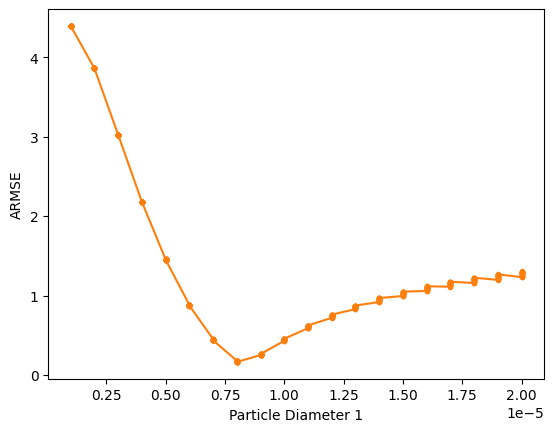

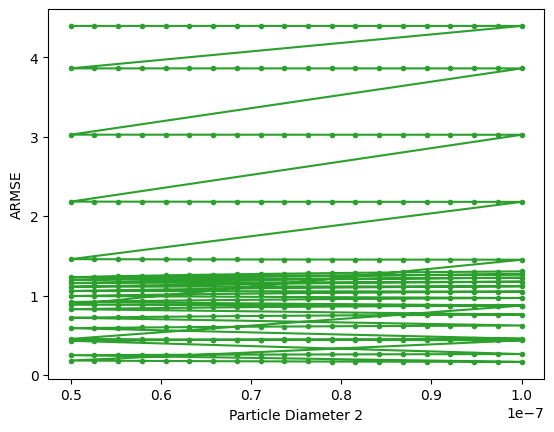

Minimum ARMSE: 0.1636062299336038
K_1 =  5.267489711934156e-16
K_2 =  6.349206349206348e-11
particle_diameter_1 =  8e-06
particle_diameter_2 =  1e-07


In [146]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 1200, 1200)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT5_800_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')
plt.plot(parameters['particle_diameter_1'], ARMSE, marker = '.', color= 'C1', linestyle = '-')
plt.xlabel('Particle Diameter 1')
plt.ylabel('ARMSE')
plt.show()

plt.plot(parameters['particle_diameter_2'], ARMSE, marker = '.', color = 'C2', linestyle = '-')
plt.xlabel('Particle Diameter 2')
plt.ylabel('ARMSE')
plt.show()

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

In [144]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 1200, 1200)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT5_800_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

minimum_ARMSE = min(ARMSE)
print('Minimum ARMSE: ' + str(minimum_ARMSE))
min_index_2 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)

print("particle_diameter_1 = ", selected_row['particle_diameter_1'])
print("particle_diameter_2 = ", selected_row['particle_diameter_2'])

Minimum ARMSE: 0.1606668425275342
K_1 =  5.267489711934156e-16
K_2 =  6.349206349206348e-11
particle_diameter_1 =  8e-06
particle_diameter_2 =  1e-07


(0.0, 6.0)

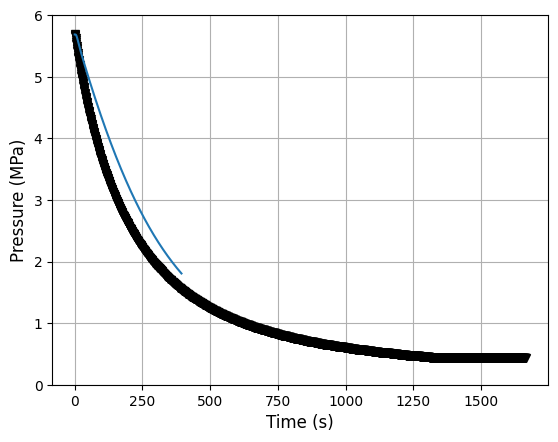

In [145]:
# Plot all pressure decays
trial = pd.read_csv('model_pellets_out.csv')
plt.plot(data20['time'], data20['CT5_800_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(trial['time'], trial['inlet-p']/1e6)
# md_df[min_index_1].plot(marker = '.')
# md_df[min_index_2].plot(marker = '.')
# plt.plot(data20['time'], data20['CT5_800_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.ylim(0, 6)
